In [2]:
# !pip install -Uq python-igraph cairocffi watermark
# !pip install -Uq networkx hypernetx celluloid hnxwidget

%reload_ext autoreload
%autoreload 2

import random
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
from python.cogtext.similarity_matrix import get_similarity_matrix
import sklearn
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

import hypernetx as hnx
import hnxwidget
from hnxwidget import HypernetxWidget

IGRAPH U--- 3 2 -- 


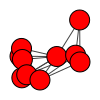

In [3]:
g = ig.Graph()

g.add_vertices(3)
g.add_edges([(0,1), (1,2)])
# g.vs[0]['name'] = 'test'
# g.vs[0].attributes()

# print(g)
ig.summary(g)

g =ig.Graph.GRG(10, .8)

ig.plot(g, bbox=(100,100))

Clustering with 10 elements and 8 clusters
[0] 0
[1] 1, 2, 7
[2] 3
[3] 4
[4] 5
[5] 6
[6] 8
[7] 9


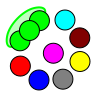

In [4]:
random.seed(42)


# a random graph
g = ig.Graph.Erdos_Renyi(10,.02)

# detect communities
comms = g.community_multilevel()

# plot and save
g_plot = ig.plot(comms, mark_groups = True, inline=True, bbox=(100,100))

# g_plot.save('outputs/multilevel_community_in_graphs.png')

print(comms)
g_plot


In [122]:

G_embeddings = pd.read_csv('models/cogtext/G_USEv4_UMAP5d_v1.csv.gz', index_col=['category', 'label'])

G_embeddings_sim = get_similarity_matrix(G_embeddings, pivot_by_category=True)
G_embeddings_sim = G_embeddings_sim.unstack().to_frame()
G_embeddings_sim.index.names = ['construct', 'task']
G_embeddings_sim.columns = ['weight']
G_embeddings_sim.reset_index(inplace=True)
G_embeddings_sim = G_embeddings_sim.query('weight > .5').reset_index()

G_embeddings_sim = G_embeddings_sim.pivot(columns='construct', index='task').drop(columns='index', errors='ignore')
G_embeddings_sim.columns = [col[1] for col in G_embeddings_sim.columns]
G_embeddings_sim.index.name=None
# DEBUG G_embeddings_sim[['BART','Delay_Discounting_task']]

# G = ig.Graph.Weighted_Adjacency(G_embeddings_sim.values, mode='UNDIRECTED', loops=False)
# detect communities
# comms = G.community_multilevel()
# plot and save
# ig.plot(comms, mark_groups = True, inline=True, bbox=(500,500))


In [123]:

affinity = pd.DataFrame(cosine_similarity(G_embeddings), index=G_embeddings.index, columns=G_embeddings.index)
affinity.columns = affinity.columns.droplevel(0)
affinity.index = affinity.index.droplevel(0)
affinity.columns.name = 'source'
affinity.index.name = 'target'
affinity = affinity.unstack().to_frame().rename(columns={0:'weight'})
affinity = affinity.query('source != target and weight > .5').reset_index()
affinity = affinity.reset_index().drop(columns='index')
# affinity.query('set(source) + set(target) == set(source) + set(target)')
mask = affinity[['source','target']].apply(lambda x: list(set(x)), axis=1).duplicated()
affinity = affinity[~mask]
affinity = affinity.pivot(columns='source', index='target').drop(columns='index', errors='ignore')
affinity.columns = [col[1] for col in affinity.columns]
affinity.index.name=None
affinity


,AttentionalInertia,BART,BehavioralRegulation,BlockDesignSubTest,BlockSpanTask,CategoryFluencyTask,CognitiveFlexibility,CognitiveFlexibilityTask,CognitiveInhibition,ColumbiaCardTask,...,SelfRegulation,Semantic_Fluency_test,SentenceRepetition,ShapeSchool,SnackDelayTask,SpinThePots,TMT_-_Trail_Making_Task,TwoStep,Verbal_fluency_task,VisuospatialWorkingMemory
AttentionalInertia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BART,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.590907,NaN,NaN,NaN,0.576352,NaN,NaN,NaN,NaN,NaN
BehavioralRegulation,NaN,0.582250,NaN,NaN,NaN,0.505525,NaN,NaN,NaN,NaN,...,0.997351,NaN,NaN,0.545773,0.878484,NaN,NaN,NaN,NaN,NaN
BlockDesignSubTest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BlockSpanTask,NaN,NaN,NaN,NaN,NaN,0.628415,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CategoryFluencyTask,NaN,0.532595,0.505525,0.523663,0.628415,NaN,NaN,NaN,NaN,0.508831,...,0.517066,0.611592,NaN,NaN,0.519489,NaN,0.679993,NaN,0.576621,NaN
CognitiveFlexibilityTask,0.552538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CognitiveInhibition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ColumbiaCardTask,NaN,0.984160,0.569914,NaN,NaN,NaN,NaN,NaN,0.530899,NaN,...,0.577704,NaN,NaN,NaN,0.556288,NaN,NaN,NaN,NaN,NaN
ContiniousPerformanceTask,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


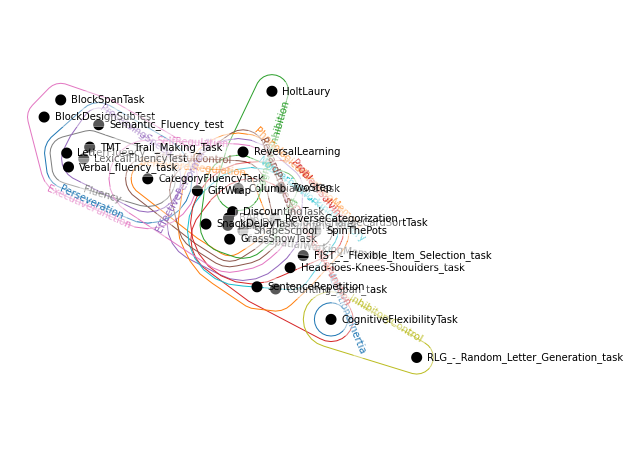

In [126]:
import hypernetx as hnx
import hypernetx.algorithms.hypergraph_modularity as hmod

# H = hnx.Hypergraph.from_dataframe(H_sim)

HG = hnx.Hypergraph.from_dataframe(G_embeddings_sim.T)
# hnx.draw_two_column(HG)
hnx.draw(HG)

In [128]:
# editor
HypernetxWidget(HG)

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'uid': 'SpinThePots'}, {'uid': 'BlockSpanTask'}…

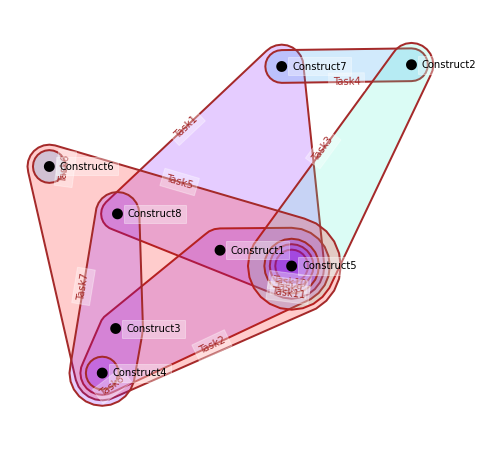

In [127]:
communities = {
    'Construct1': ('Task1', 'Task2'),
    'Construct2': ('Task3', 'Task4'),
    'Construct3': ('Task5', 'Task2', 'Task7'),
    'Construct4': ('Task5', 'Task2', 'Task7', 'Task8'),
    'Construct5': ('Task5', 'Task1', 'Task2', 'Task9', 'Task3', 'Task10', 'Task11'),
    'Construct6': ('Task5', 'Task6'),
    'Construct7': ('Task1', 'Task4'),
    'Construct8': ('Task1', 'Task7')
}


H = hnx.Hypergraph(communities)

# face colors
cmap = plt.cm.rainbow
edge_sizes = np.array([len(e) for e in H.edges()])
norm = plt.Normalize(edge_sizes.min(), edge_sizes.max())
facecolors = cmap([norm(c) for c in edge_sizes]) * (1, 1, 1, 0.2)

hnx.draw(H.dual(),
        edges_kwargs={
            'linewidths': 2,
            'edgecolors': 'brown',
            'facecolors': facecolors
        },
         nodes_kwargs={
    # 'node_size': [np.random.randint(3,5) for n in H.collapse_nodes()]
})

# hnx.draw(H.dual())

plt.show()

In [16]:
%reload_ext watermark
# %watermark
%watermark -iv

igraph    : 0.9.8
sys       : 3.8.12 | packaged by conda-forge | (default, Oct 12 2021, 21:50:56) 
[Clang 11.1.0 ]
hnxwidget : 0.1.1b1
hypernetx : 1.2
numpy     : 1.20.3
matplotlib: 3.4.3
pandas    : 1.3.4
sklearn   : 1.0.1

